* Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

* Importamos las librerías creadas para trabajar

In [3]:
import ext_datos as ext
import procesar as pro
import time_plot as tplt

* Generamos los datasets de todos los días

* En primer lugar se extraen los datos de todos los archivos
    de cada día y se genera una lista de tablas separadas por motor

In [4]:
dia1 = ext.extraer_data('dia1')

In [5]:
cd ..

c:\Users\Angelica\dataTritiumWS22


In [6]:
dia2 = ext.extraer_data('dia2')

In [7]:
cd ..

c:\Users\Angelica\dataTritiumWS22


In [8]:
dia3 = ext.extraer_data('dia3')

In [9]:
cd ..

c:\Users\Angelica\dataTritiumWS22


In [10]:
dia4 = ext.extraer_data('dia4')

* Se procesan las listas anteriores, se concatenan por motor según
    la hora de los registros y se rellenan los espacios vacíos con
    datos NaN, luego se juntan de costado las tablas (join) y se
    le añade el sufijo _m1 y _m2 para diferenciar las columnas

In [11]:
motoresdia1 = pro.procesar(dia1)

In [12]:
motoresdia2 = pro.procesar(dia2)

In [13]:
motoresdia3 = pro.procesar(dia3)

In [14]:
motoresdia4 = pro.procesar(dia4)

* Cálculo de promedios

### Día 4

* Se añade la potencia calculada como $V\cdot{I}$

In [15]:
motoresdia4['pot_m2']=motoresdia4.busCurrent_m2*motoresdia4.busVoltage_m2

In [16]:
motoresdia4['pot_m1']=motoresdia4.busCurrent_m1*motoresdia4.busVoltage_m1

In [17]:
motoresdia3['pot_m2']=motoresdia3.busCurrent_m2*motoresdia3.busVoltage_m2
motoresdia3['pot_m1']=motoresdia3.busCurrent_m1*motoresdia3.busVoltage_m1

In [18]:
motoresdia2['pot_m2']=motoresdia2.busCurrent_m2*motoresdia2.busVoltage_m2
motoresdia2['pot_m1']=motoresdia2.busCurrent_m1*motoresdia2.busVoltage_m1

In [19]:
motoresdia1['pot_m2']=motoresdia1.busCurrent_m2*motoresdia1.busVoltage_m2
motoresdia1['pot_m1']=motoresdia1.busCurrent_m1*motoresdia1.busVoltage_m1

Se calcula la potencia promedio de todos los datos positivos que se obtienen de cada motor

In [20]:
promediodia4_pot_m1_todos_positivos=motoresdia4[motoresdia4.pot_m1>0].pot_m1.dropna().mean()
promediodia4_pot_m1_todos_positivos

1343.2712991041869

In [21]:
promediodia4_pot_m1_algunos_positivos = motoresdia4[motoresdia4.pot_m1>0].dropna().pot_m1.mean()
promediodia4_pot_m1_algunos_positivos

1340.9836630260627

Se observa que la variación de potencia promedio tomando los datos solo entre aquellos en donde existe información de ambos motores no es significativa respecto a la potencia promedio tomando el total de datos de cada motor por separado, sin usar la muestra que coincida en espacio temporal

In [22]:
promediodia4_pot_m2_todos_positivos = motoresdia4[motoresdia4.pot_m2>0].pot_m2.dropna().mean()
promediodia4_pot_m2_todos_positivos

1130.389884273317

In [23]:
promediodia4_pot_m2_algunos_positivos = motoresdia4[motoresdia4.pot_m2>0].dropna().pot_m2.mean()
promediodia4_pot_m2_algunos_positivos

1129.9650190058408

Se verifica con el segundo motor, que es el que tiene menos potencia y menos datos, en el día 2 es un 80% y el primero casi el 100%, en los otros días puede variar la apreciación

Potencia promedio consumida con 360 Kg último día ambos motores solo acelerendo, pot > 0

In [24]:
pot_prom_ambos_dia4 = promediodia4_pot_m1_algunos_positivos+promediodia4_pot_m2_algunos_positivos
pot_prom_ambos_dia4

2470.9486820319034

Potencia promedio entregada por regeneración

In [25]:
promediodia4_pot_m1_algunos_negativos = motoresdia4[motoresdia4.pot_m1<0].dropna().pot_m1.mean()
promediodia4_pot_m1_algunos_negativos 

-749.66945667315588

In [26]:
promediodia4_pot_m2_algunos_negativos = motoresdia4[motoresdia4.pot_m2<0].dropna().pot_m2.mean()
promediodia4_pot_m2_algunos_negativos 

-686.84717211990721

In [27]:
pot_prom_reg_ambos_dia4 = promediodia4_pot_m1_algunos_negativos+promediodia4_pot_m2_algunos_negativos
pot_prom_reg_ambos_dia4

-1436.5166287930631

In [28]:
abs(pot_prom_reg_ambos_dia4/pot_prom_ambos_dia4)

0.58136238896381731

Potencia promedio dia 4 consumida y regenerada a la vez

In [29]:
promediodia4_pot_m1_algunos_ambos = motoresdia4[motoresdia4.pot_m1!=0].dropna().pot_m1.mean()
promediodia4_pot_m1_algunos_ambos 

1109.9504543656908

In [30]:
promediodia4_pot_m2_algunos_ambos = motoresdia4[motoresdia4.pot_m2!=0].dropna().pot_m2.mean()
promediodia4_pot_m2_algunos_ambos 

904.29168993214194

In [31]:
pot_prom_cons_y_reg = promediodia4_pot_m1_algunos_ambos+promediodia4_pot_m2_algunos_ambos
pot_prom_cons_y_reg

2014.2421442978327

Impacto uso de regenerativo ultimo dia de carrera

In [33]:
1 - pot_prom_cons_y_reg/(pot_prom_ambos_dia4)

0.18483044227309209

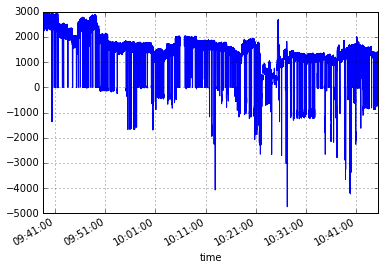

In [37]:
motoresdia4.pot_m2[10000:30000].plot()

~~Promedio día 4 incluyendo recargo de celdas.. solo en intervalo donde existen datos de ambos motores~~

In [33]:
promediodia4_pot_m1_algunos_todo = motoresdia4.dropna().pot_m1.mean()
promediodia4_pot_m1_algunos_todo 

813.6939774760142

In [34]:
promediodia4_pot_m2_algunos_todo = motoresdia4.dropna().pot_m2.mean()
promediodia4_pot_m2_algunos_todo 

662.89368226963484

In [35]:
promediototalconsumo = promediodia4_pot_m2_algunos_todo+promediodia4_pot_m1_algunos_todo
promediototalconsumo

1476.587659745649

Impacto carga de celdas

In [36]:
1-promediototalconsumo/pot_prom_cons_y_reg

0.26692643983954112

Validación en un intervalo de competencia solamente, no luego de llegar y recargar.. solo en carrera

In [37]:
promediodia4_pot_m1_algunos_todo_val = motoresdia4.dropna().pot_m1[0:110000].mean()
promediodia4_pot_m1_algunos_todo_val 

975.6521323211665

In [38]:
promediodia4_pot_m2_algunos_todo_val = motoresdia4.dropna().pot_m2[0:110000].mean()
promediodia4_pot_m2_algunos_todo_val

794.53780352317597

In [39]:
promediototalconsumo_val = promediodia4_pot_m2_algunos_todo_val+promediodia4_pot_m1_algunos_todo_val
promediototalconsumo_val

1770.1899358443425

In [ ]:
1-promediototalconsumo_val/pot_prom_cons_y_reg

0.12116329168485707

In [ ]:
jdj

In [ ]:
1+1

#### Máximo absoluto día 4

In [ ]:
maximo_m1

In [ ]:
len(motoresdia4[motoresdia4.pot_m1<0].pot_m1.dropna())

In [ ]:
promedio_pot_m1_algunos=motoresdia4[motoresdia4.pot_m1<0].dropna().pot_m1.mean()

In [ ]:
len(motoresdia4[motoresdia4.pot_m1<0].dropna().pot_m1)

In [ ]:
motoresdia4[motoresdia4.pot_m1<0].dropna().pot_m1.mean()

In [ ]:
motoresdia4[motoresdia4.pot_m2<0].dropna().pot_m2.mean()

In [ ]:
motoresdia4[motoresdia4.pot_m2!=0].pot_m2.dropna().mean()

In [ ]:
1343+1130

In [ ]:
motoresdia3['pot_m2']=motoresdia3.busCurrent_m2*motoresdia3.busVoltage_m2

In [ ]:
motoresdia3['pot_m1']=motoresdia3.busCurrent_m1*motoresdia3.busVoltage_m1

In [ ]:
motoresdia3[motoresdia3.pot_m1<0].pot_m1.dropna().mean()

In [ ]:
motoresdia3[motoresdia3.pot_m2<0].pot_m2.dropna().mean()

In [ ]:
motoresdia2['pot_m2']=motoresdia2.busCurrent_m2*motoresdia2.busVoltage_m2

In [ ]:
motoresdia2['pot_m1']=motoresdia2.busCurrent_m1*motoresdia2.busVoltage_m1

In [ ]:
motoresdia2[motoresdia2.pot_m1<0].pot_m1.dropna().mean()

In [ ]:
motoresdia2[motoresdia2.pot_m2<0].pot_m2.dropna().mean()

In [ ]:
motoresdia1['pot_m2']=motoresdia1.busCurrent_m2*motoresdia1.busVoltage_m2

In [ ]:
motoresdia1['pot_m1']=motoresdia1.busCurrent_m1*motoresdia1.busVoltage_m1

In [ ]:
motoresdia1[motoresdia1.pot_m1!=0].pot_m1.dropna().mean()

In [ ]:
motoresdia1[motoresdia1.pot_m2!=0].pot_m2.dropna().mean()